# Чемпионат: Новосибирская область

In [41]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import DBSCAN
import lightgbm as lgb
from lightgbm import LGBMClassifier


# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



from sklearn import preprocessing

# Импорт библиотек добавление синтетических данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

In [108]:
# Загрузка данных
train_data = pd.read_csv('train_dataset_train.csv')
test_data = pd.read_csv('test_dataset_test.csv')
sample_data = pd.read_csv('sample_solution.csv')

### Описание входных значений:
- ***train.csv*** — файл, содержащий данные для тренировки
- ***test.csv*** - содержит данные ТЛО для предсказания
- ***sample_solution.csv*** — пример файла для отправки


### Пояснение к столбцам:
- Параметр «id» — уникальный идентификатор ТЛО.
- Параметр «Easting» — направление на восток, условная координата Х ТЛО в метрах
- Параметр «Northing» — направление на север, условная координата У ТЛО в метрах
- Параметр «Height» — отметка (высота), условная координата Н ТЛО в метрах
- Параметр «Reflectance» — отражательная способность ТЛО
- Параметр «Class» — признак класса точк

### Пояснение к данным:
Столбец «Class» хранит в себе тип класса точки, где:
- 0 – точки земли
- 1 – точки опор
- 3 – точки растительности
- 4 – точки рельсов
- 5 – точки элементов контактной сети
- 64 – точки шумов

In [ ]:
train_data.info()


In [ ]:
train_data.isnull().sum()

In [ ]:
test_data

In [ ]:
test_data.isnull().sum()


In [ ]:
sample_data

## Визуальный анализ данных

### Пояснение к данным:
Столбец «Class» хранит в себе тип класса точки, где:
- 0 – точки земли
- 1 – точки опор
- 3 – точки растительности
- 4 – точки рельсов
- 5 – точки элементов контактной сети
- 64 – точки шумов

Text(0.5, 1.0, 'Распределение класса точки')

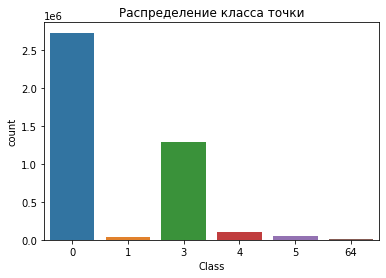

In [86]:
sns.countplot(x = "Class" , data  = train_data).set_title('Распределение класса точки')

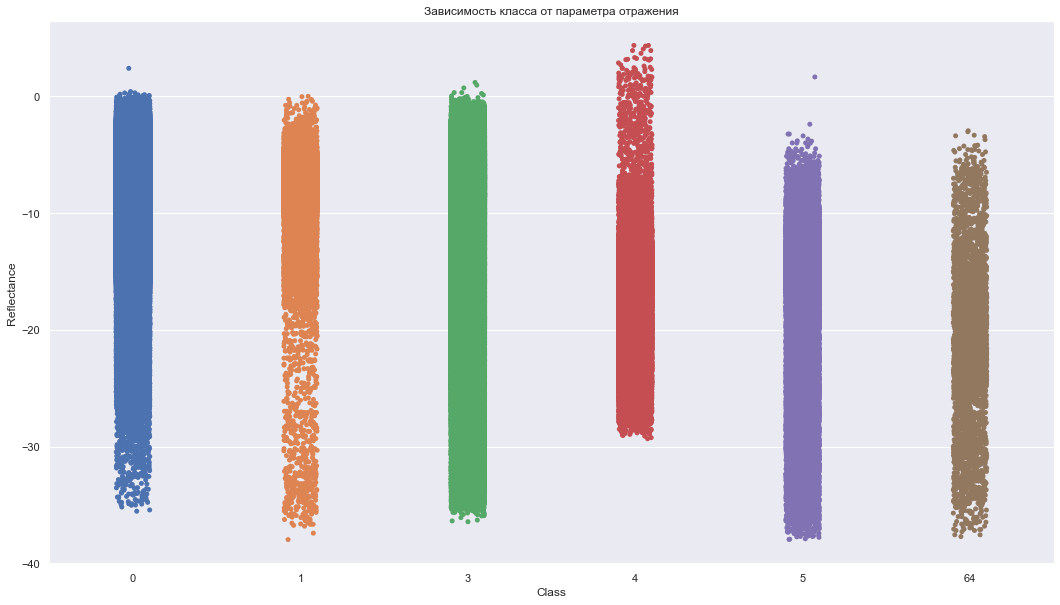

In [87]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = train_data, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

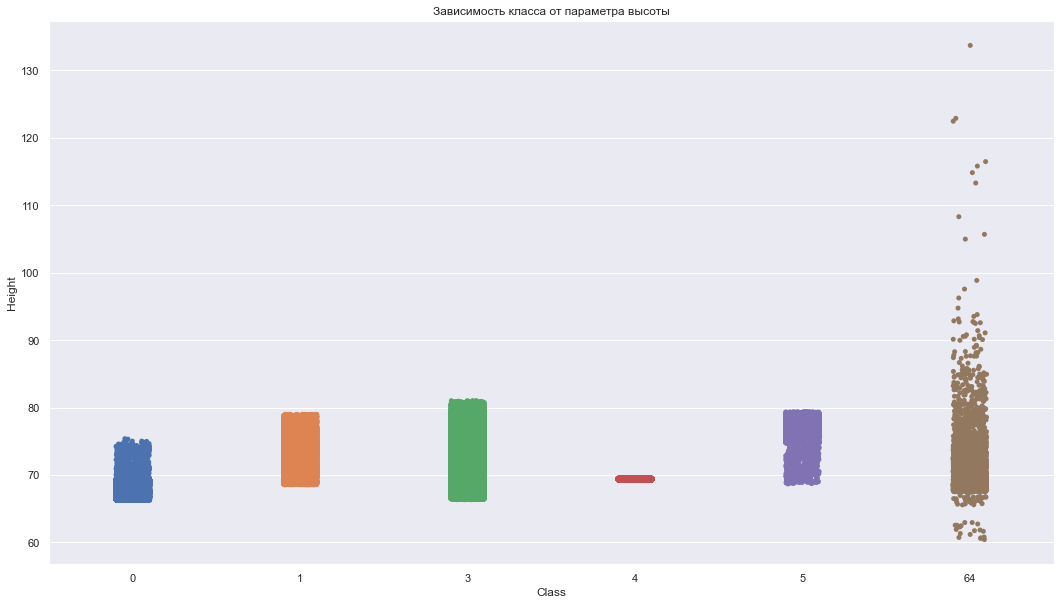

In [88]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = train_data, x= "Class", y = "Height").set_title('Зависимость класса от параметра высоты');

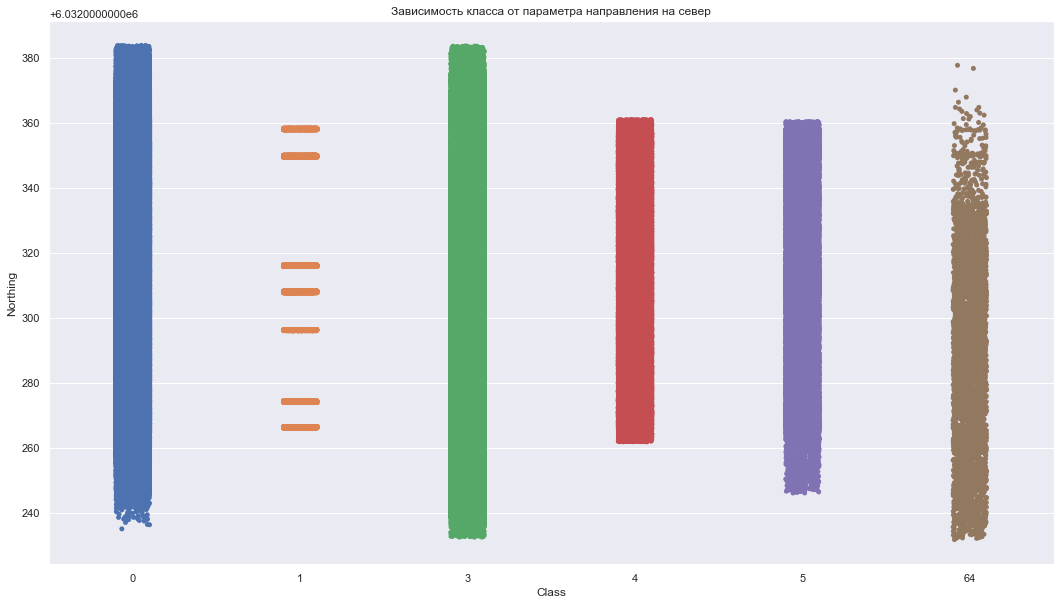

In [89]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = train_data, x= "Class", y = "Northing").set_title('Зависимость класса от параметра направления на север');

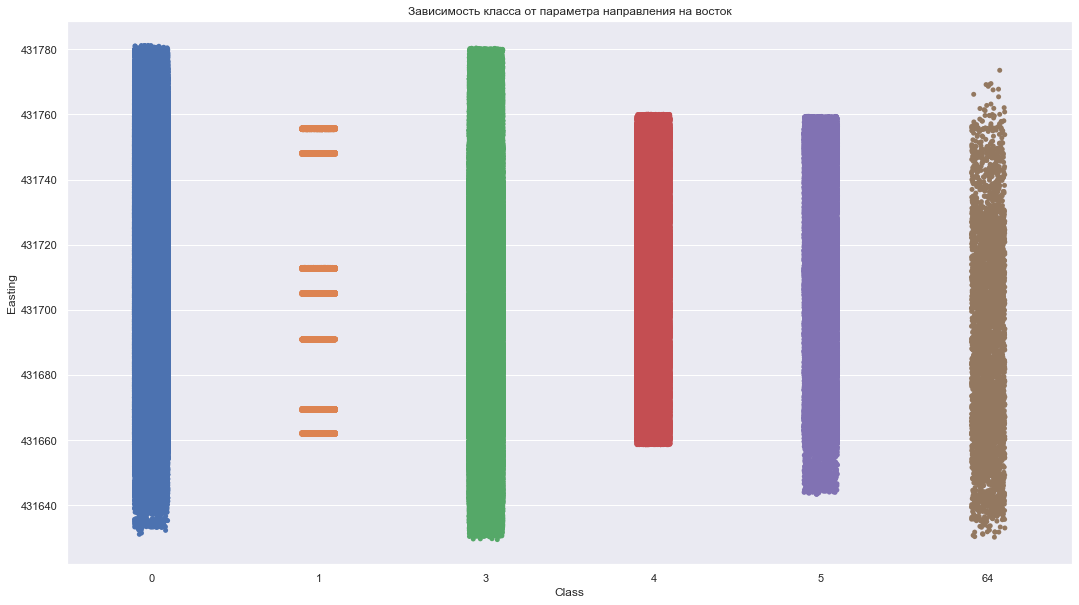

In [90]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = train_data, x= "Class", y = "Easting").set_title('Зависимость класса от параметра направления на восток');

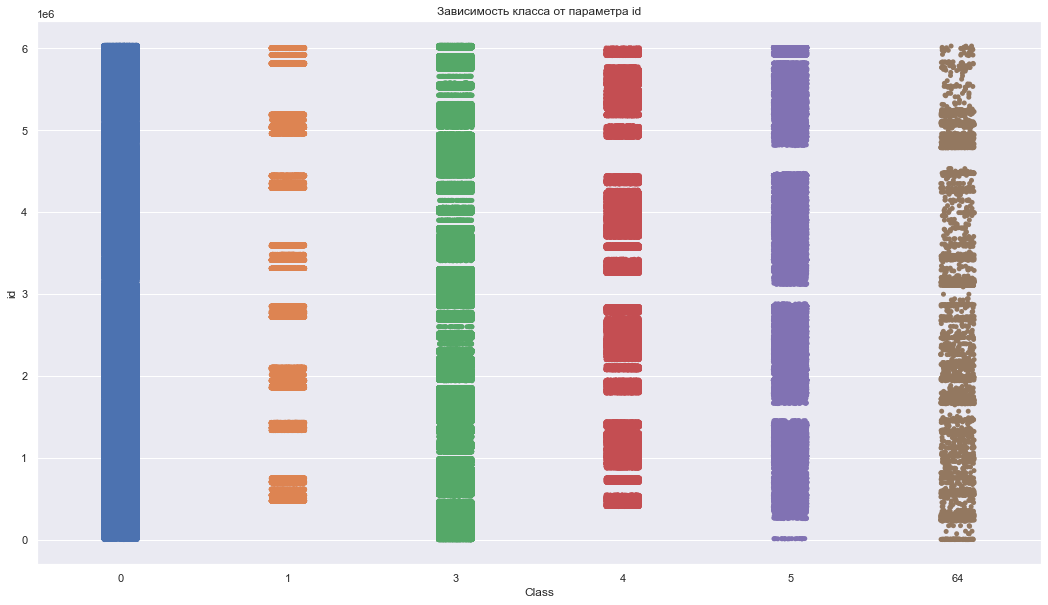

In [91]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = train_data, x= "Class", y = "id").set_title('Зависимость класса от параметра id');

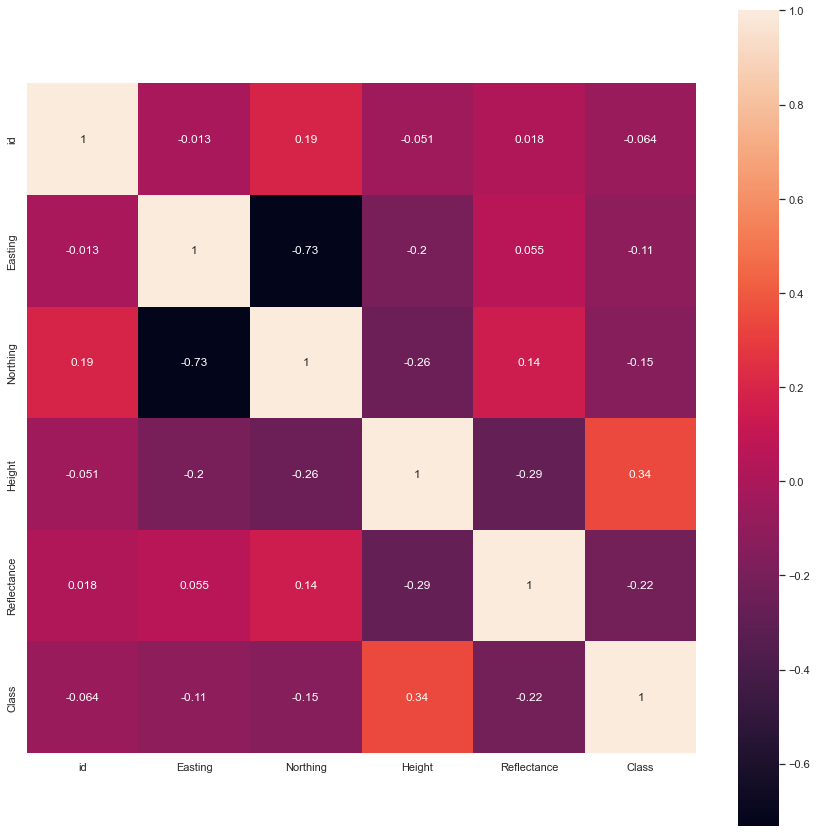

In [92]:
plt.rcParams['figure.figsize']=(15,15)
g = sns.heatmap(train_data.corr(), square = True, annot=True)

## Статический анализ данных 

In [93]:
# общая характеристика по данным
train_data.describe()

,id,Easting,Northing,Height,Reflectance,Class
count,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06
mean,3.016931e+06,4.317068e+05,6.032308e+06,6.940159e+01,-1.053063e+01,1.155633e+00
std,1.741258e+06,2.977279e+01,2.981495e+01,2.269884e+00,4.515277e+00,2.535087e+00
min,1.206000e+03,4.316294e+05,6.032232e+06,6.041440e+01,-3.796000e+01,0.000000e+00
25%,1.509238e+06,4.316825e+05,6.032284e+06,6.779070e+01,-1.263000e+01,0.000000e+00
50%,3.016603e+06,4.317069e+05,6.032307e+06,6.920490e+01,-9.940000e+00,0.000000e+00
75%,4.525054e+06,4.317308e+05,6.032332e+06,6.929940e+01,-7.730000e+00,3.000000e+00
max,6.032767e+06,4.317812e+05,6.032384e+06,1.337185e+02,4.360000e+00,6.400000e+01


In [94]:
# характеристика по классым

train_data.groupby('Class').describe()

id                                                               \
           count          mean           std       min         25%        50%   
Class                                                                           
0      2731040.0  3.150017e+06  1.735920e+06    1344.0  1577142.75  3058348.5   
1        39384.0  3.339461e+06  1.782311e+06  473095.0  1864490.50  3412000.5   
3      1287816.0  2.708938e+06  1.725489e+06    1206.0  1123443.75  2762832.5   
4       103453.0  3.131486e+06  1.555798e+06  404381.0  1906874.00  3272703.0   
5        55985.0  3.203960e+06  1.745472e+06    9837.0  1791646.00  3273727.0   
64        4416.0  2.598280e+06  1.683483e+06    1259.0  1180069.25  2251153.5   

                                Easting                 ...     Height  \
              75%        max      count           mean  ...        75%   
Class                                                   ...              
0      4579912.00  6032764.0  2731040.0  431710.771688  ...  69.234600   
1      5029655.25  6007376.0    39384.0  431708.825087  ...  75.087200   
3      4281394.50  6032767.0  1287816.0  431698.054721  ...  72.792425   
4      4166145.00  6001388.0   103453.0  431709.108017  ...  69.462900   
5      5016753.00  6007375.0    55985.0  431707.625043  ...  77.309000   
64     4084887.25  6025042.0     4416.0  431692.136427  ...  72.947550   

                Reflectance                                               \
            max       count       mean       std    min      25%     50%   
Class                                                                      
0       75.3789   2731040.0  -9.763194  3.174139 -35.53 -11.7700  -9.830   
1       79.0056     39384.0  -8.053922  3.668342 -37.96  -8.4100  -7.140   
3       81.0297   1287816.0 -11.397119  5.874556 -36.43 -14.9300  -9.770   
4       69.5774    103453.0 -16.937925  3.567386 -29.32 -19.2700 -16.120   
5       79.3887     55985.0 -17.117574  6.138419 -37.95 -19.4200 -15.030   
64     133.7185      4416.0 -20.937883  6.607886 -37.70 -24.2525 -21.135   

                      
           75%   max  
Class                 
0      -8.0600  2.40  
1      -6.2600  0.00  
3      -6.9400  1.19  
4     -14.4700  4.36  
5     -13.1200  1.66  
64    -17.0275 -2.95  

[6 rows x 40 columns]

In [95]:
# Анализ признака Reflectance
train_data[train_data['Reflectance']>0]

,id,Easting,Northing,Height,Reflectance,Class
26689,3327742,431745.7978,6.032272e+06,69.4808,3.17,4
92343,3695088,431677.2387,6.032339e+06,69.4598,2.24,4
101862,4148076,431718.2244,6.032299e+06,69.4652,2.30,4
109470,3308783,431745.2850,6.032272e+06,69.4784,1.44,4
185647,3585796,431707.6998,6.032309e+06,69.4580,2.59,4
...,...,...,...,...,...,...
4095560,3250301,431735.7276,6.032282e+06,69.4700,3.24,4
4106609,3707437,431668.2144,6.032347e+06,69.4582,0.56,4
4148456,3834440,431699.3854,6.032317e+06,69.4543,2.42,4
4180650,3696700,431677.9553,6.032338e+06,69.4634,1.56,4


In [96]:
# Сравнение признака Reflectance между различными классами
train_data[train_data['Class'] ==64].head(50)

,id,Easting,Northing,Height,Reflectance,Class
2009,1782549,431720.8395,6.032274e+06,67.6567,-9.18,64
2634,2687361,431720.2722,6.032304e+06,90.8015,-31.47,64
3757,5057876,431762.7407,6.032272e+06,71.2485,-20.90,64
4523,4882525,431737.9000,6.032259e+06,67.8381,-8.56,64
4550,1977375,431666.8072,6.032298e+06,70.7111,-23.55,64
6612,3450132,431659.7515,6.032304e+06,73.4445,-10.59,64
7121,263868,431695.1832,6.032270e+06,68.2370,-9.83,64
7621,3466177,431665.6624,6.032293e+06,74.8338,-22.25,64
7706,4894645,431711.1882,6.032279e+06,67.9568,-21.24,64
8895,1714916,431727.8845,6.032237e+06,72.6772,-19.06,64


In [97]:
# удалим строки с Reflectance>0
train_data = train_data[train_data['Reflectance']<0]

In [98]:
train_data

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


In [99]:
test_data[test_data['Reflectance'] >test_data['Reflectance'].quantile(0.997)]

,id,Easting,Northing,Height,Reflectance
286,201832,431766.8878,6.032283e+06,66.8270,-1.71
1092,2688525,431771.8738,6.032284e+06,67.7021,-1.69
1110,220627,431712.1282,6.032338e+06,66.7624,-1.17
1570,1446095,431681.3618,6.032372e+06,67.5915,-1.42
2075,4459647,431699.0282,6.032354e+06,67.5785,-1.74
...,...,...,...,...,...
1806416,6011336,431684.5890,6.032373e+06,67.5492,-1.77
1806481,1442277,431692.7198,6.032361e+06,67.5343,-0.59
1808497,213861,431750.6201,6.032303e+06,67.2943,-1.55
1809001,1338844,431699.1208,6.032350e+06,67.0279,-1.61


In [ ]:
train_data.describe()

## Применение  правила 3 сигм

In [ ]:
Reflectance_997 = train_data[train_data['Reflectance']>train_data['Reflectance'].quantile(0.997)]
Reflectance_997

In [ ]:
sns.countplot(x = "Class" , data =Reflectance_997).set_title('Распределение класса точки')

In [109]:
## удалим строки которые не входят в интеврал  3 сигм, кроме строк - шуммов ( класс 64), по признаку Reflectance

train_data = train_data[train_data['Reflectance']<train_data['Reflectance'].quantile(0.997)]



In [ ]:
sns.countplot(x = "Class" , data =train_data).set_title('Распределение класса точки')

In [142]:
## датафрейм с значеними Height не лежащее в итервале 3 сигм:
Height_997 = train_data[train_data['Height']>train_data['Height'].quantile(0.997)]

Text(0.5, 1.0, 'Распределение класса точки')

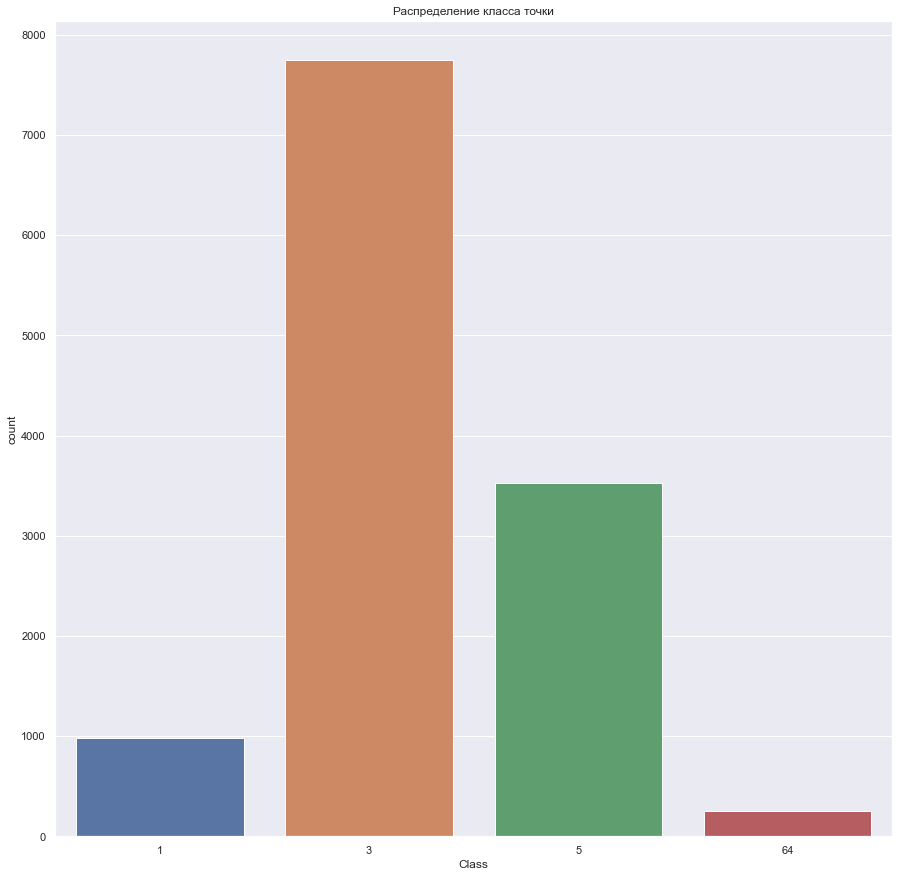

In [143]:
sns.countplot(x = "Class" , data  = Height_997).set_title('Распределение класса точки')

In [110]:
## удалим строки которые не входят интеврал правила 3 сигм, кроме строк - шуммов ( класс 64), по признаку Height

train_data = train_data.drop(train_data[(train_data['Height']>train_data['Height'].quantile(0.997)) & (train_data['Class'] !=64)].index)
train_data

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


In [ ]:
# df = df.drop(df[(df.score < 50) & (df.score > 20)].index)

In [ ]:
## датафрейм с значеними Height не лежащее в итервале 3 сигм:
Northing_997 = train_data[train_data['Northing']> train_data['Northing'].quantile(0.997)]
Northing_997

In [ ]:
sns.countplot(x = "Class" , data  = Northing_997).set_title('Распределение класса точки')

In [111]:
## удалим строки которые не входят интеврал правила 3 сигм, кроме строк - шуммов ( класс 64), по признаку Northing
train_data = train_data.drop(train_data[(train_data['Northing']>train_data['Northing'].quantile(0.997)) & (train_data['Class'] !=64)].index)
train_data


,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


In [ ]:
## датафрейм с значеними Easting не лежащее в итервале 3 сигм:
Easting_997 = train_data[train_data['Easting']> train_data['Easting'].quantile(0.997)]
Easting_997

In [ ]:
sns.countplot(x = "Class" , data  = Easting_997).set_title('Распределение класса точки')

In [112]:
## удалим строки которые не входят интеврал правила 3 сигм, кроме строк - шуммов ( класс 64), по признаку Easting
train_data = train_data.drop(train_data[(train_data['Easting']>train_data['Easting'].quantile(0.997)) & (train_data['Class'] !=64)].index)
train_data

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


In [ ]:
train_data

In [144]:
# Стаическая характеристика для 1 класса
train_data[train_data['Class'] == 1].describe()

,id,Easting,Northing,Height,Reflectance,Class
count,3.861900e+04,38619.000000,3.861900e+04,38619.000000,38619.000000,38619.0
mean,3.335598e+06,431708.868745,6.032312e+06,73.145866,-8.048892,1.0
std,1.782513e+06,34.949463,3.399895e+01,2.466888,3.628379,0.0
min,4.730950e+05,431661.755200,6.032266e+06,68.532300,-37.960000,1.0
25%,1.863596e+06,431669.364000,6.032274e+06,71.208150,-8.410000,1.0
50%,3.411932e+06,431712.462600,6.032308e+06,73.058100,-7.140000,1.0
75%,5.029598e+06,431748.052600,6.032350e+06,74.959200,-6.260000,1.0
max,6.007376e+06,431755.899000,6.032358e+06,78.370200,-1.830000,1.0


In [145]:
# Стаическая характеристика для 3 класса
train_data[ train_data['Class'] == 3].describe()

,id,Easting,Northing,Height,Reflectance,Class
count,1.269862e+06,1.269862e+06,1.269862e+06,1.269862e+06,1.269862e+06,1269862.0
mean,2.702378e+06,4.316978e+05,6.032296e+06,7.080071e+01,-1.140489e+01,3.0
std,1.723305e+06,2.999000e+01,2.947180e+01,2.864989e+00,5.871562e+00,0.0
min,1.206000e+03,4.316294e+05,6.032232e+06,6.632050e+01,-3.643000e+01,3.0
25%,9.664942e+05,4.316726e+05,6.032272e+06,6.824220e+01,-1.493000e+01,3.0
50%,2.744043e+06,4.316984e+05,6.032294e+06,7.025560e+01,-9.760000e+00,3.0
75%,4.273406e+06,4.317218e+05,6.032319e+06,7.274330e+01,-6.940000e+00,3.0
max,6.032767e+06,4.317701e+05,6.032372e+06,7.837120e+01,-1.820000e+00,3.0


In [146]:
# Стаическая характеристика для 4 класса
train_data[ train_data['Class'] == 4].describe()

,id,Easting,Northing,Height,Reflectance,Class
count,1.032530e+05,103253.000000,1.032530e+05,103253.000000,103253.000000,103253.0
mean,3.130274e+06,431709.105164,6.032311e+06,69.409362,-16.971701,4.0
std,1.556985e+06,27.870977,2.720863e+01,0.060090,3.486588,0.0
min,4.043810e+05,431658.564000,6.032262e+06,69.249400,-29.320000,4.0
25%,1.905921e+06,431684.963700,6.032288e+06,69.356100,-19.270000,4.0
50%,3.271592e+06,431709.092500,6.032311e+06,69.424600,-16.130000,4.0
75%,4.166878e+06,431733.004300,6.032335e+06,69.462900,-14.480000,4.0
max,6.001388e+06,431760.063100,6.032361e+06,69.577400,-1.830000,4.0


In [147]:
# Стаическая характеристика для 5 класса
train_data[train_data['Class'] == 5].describe()

,id,Easting,Northing,Height,Reflectance,Class
count,5.337500e+04,53375.000000,5.337500e+04,53375.000000,53375.000000,53375.0
mean,3.204807e+06,431707.588013,6.032310e+06,76.276326,-17.262947,5.0
std,1.745653e+06,30.454660,2.967219e+01,1.009782,6.138249,0.0
min,9.837000e+03,431643.358400,6.032246e+06,68.668600,-37.950000,5.0
25%,1.785098e+06,431679.918350,6.032283e+06,75.644800,-19.700000,5.0
50%,3.269937e+06,431707.978800,6.032310e+06,75.744700,-15.140000,5.0
75%,5.016148e+06,431734.416850,6.032336e+06,77.087750,-13.230000,5.0
max,6.006875e+06,431759.389900,6.032360e+06,78.371200,-2.390000,5.0


In [148]:
# Стаическая характеристика для 64 класса
train_data[train_data['Class'] == 64].describe()

,id,Easting,Northing,Height,Reflectance,Class
count,4.416000e+03,4416.000000,4.416000e+03,4416.000000,4416.000000,4416.0
mean,2.598280e+06,431692.136427,6.032290e+06,71.469582,-20.937883,64.0
std,1.683483e+06,30.552120,3.041854e+01,4.368148,6.607886,0.0
min,1.259000e+03,431630.182400,6.032232e+06,60.414400,-37.700000,64.0
25%,1.180069e+06,431667.006300,6.032265e+06,68.711875,-24.252500,64.0
50%,2.251154e+06,431691.707500,6.032290e+06,70.603400,-21.135000,64.0
75%,4.084887e+06,431715.464675,6.032314e+06,72.947550,-17.027500,64.0
max,6.025042e+06,431773.531200,6.032378e+06,133.718500,-2.950000,64.0


In [7]:
train_data

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


# объединим данные 

In [113]:
# объединим данные 

df = pd.concat([train_data, test_data])

In [ ]:
df

In [ ]:
df

In [117]:
train_data

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0
...,...,...,...,...,...,...
4222089,2498809,431721.6917,6.032297e+06,69.2220,-9.21,0
4222090,146939,431684.7126,6.032323e+06,67.5003,-9.52,0
4222091,5641497,431735.0991,6.032293e+06,68.9625,-10.30,0
4222092,3833813,431702.1040,6.032318e+06,69.2873,-9.94,0


In [114]:
df['id'] = (df['id'] - df['id'].min()) / ( df['id'].max() - df['id'].min())*5

In [115]:
df['Easting'] = (df['Easting'] - df['Easting'].mean()) / df['Easting'].std()

In [116]:
df['Northing'] = (df['Northing'] - df['Northing'].mean()) / df['Northing'].std()

In [ ]:
#df['Height'] = (df['Height'] - df['Height'].min()) / ( df['Height'].max() - df['Height'].min())*5

In [ ]:
#df['Reflectance'] = ( df['Reflectance'] - df['Reflectance'].mean()) / df['Reflectance'].std()

In [ ]:
df

In [118]:
X_1 =  df.drop(['Class'], axis = 1).iloc[:4171784, :]

In [119]:
y_1 = df[['Class']].iloc[:4171784, :]

In [120]:
X_pred =  df.drop(['Class'], axis = 1).iloc[4171784:, :]

In [121]:
y_1 = y_1.astype(int)

In [ ]:
X_1

In [ ]:
y_1

In [ ]:
# Сделаем перевод:
# 0 -->0
# 1 -->1
# 3 -->2
# 4 -->3
# 5 -->4
# 64 -->5

In [122]:
y_1['Class'] = np.where(y_1['Class'] ==3, 2, y_1['Class'])

y_1['Class'] = np.where(y_1['Class'] ==4, 3, y_1['Class'])

y_1['Class'] = np.where(y_1['Class'] ==5, 4, y_1['Class'])

y_1['Class'] = np.where(y_1['Class'] ==64, 5, y_1['Class'])

## Используем SMOTE для уравновешивания классов

In [123]:
ada = SMOTE(random_state=42, n_jobs = -1)
X_res, y_res = ada.fit_resample(X_1, y_1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=10)

In [ ]:
X_train

## Модель XGBClassifier

In [ ]:
model = XGBClassifier(n_jobs=-1, random_state=17)


In [ ]:
xgbc= model.fit(X_train, y_train)
xgbc.score(X_test, y_test)

In [ ]:
0.975837630292248

0.9694389927158397

In [ ]:
sample_1 = sample_data.copy()

In [ ]:
sample_1['Class'] = xgbc.predict(X_pred)

In [ ]:
y_pred1 = xgbc.predict(X_test)

In [ ]:
sample_1['Class'].value_counts()

In [ ]:
sns.countplot(x = "Class" , data  = sample_1).set_title('Распределение класса точки')

In [ ]:
print(confusion_matrix(y_test, y_pred1))

In [ ]:
print(classification_report(y_test, y_pred1, digits=6))

In [ ]:
sample_1['Class'] = np.where(sample_1['Class'] ==5, 64, sample_1['Class'] )

In [ ]:
sample_1['Class'] = np.where(sample_1['Class'] ==4, 5, sample_1['Class'] )

In [ ]:
sample_1['Class'] = np.where(sample_1['Class'] ==3, 4, sample_1['Class'] )

In [ ]:
sample_1['Class'] = np.where(sample_1['Class']==2, 3, sample_1['Class'] )

In [ ]:
sns.countplot(x = "Class" , data  = sample_1).set_title('Распределение класса точки')

In [ ]:
sample_1.to_csv('sample1_3.csv', index=False)

### Score = 0.944550

## Модель GradientBoostingClassifier

In [ ]:
model1 = GradientBoostingClassifier(random_state=17)
gbm = model1.fit(X_train, y_train)
gbm.score(X_test, y_test)

In [ ]:
sample_2 = sample_data.copy()

In [ ]:
sample_2['Class'] = gbm.predict(X_pred)

In [ ]:
sample_2

In [ ]:
y_pred2 = gbm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2, digits=6))

In [ ]:
sns.countplot(x = "Class" , data  = sample_2).set_title('Распределение класса точки')

In [ ]:
sample_2['Class'] = np.where(sample_2['Class'] ==5, 64, sample_2['Class'] )

In [ ]:
sample_2['Class'] = np.where(sample_2['Class'] ==4, 5, sample_2['Class'] )

In [ ]:
sample_2['Class'] = np.where(sample_2['Class'] ==3, 4, sample_2['Class'] )

In [ ]:
sample_2['Class'] = np.where(sample_2['Class']==2, 3, sample_2['Class'] )

In [ ]:
sample_2.to_csv('sample2.csv', index=False)

### Маленький Score

## Модель HistGradientBoostingClassifier

In [15]:
model_hgbc = HistGradientBoostingClassifier(random_state=17)
hgbc = model_hgbc.fit(X_train, y_train)
hgbc.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9610317355700067

0.9610317355700067

In [23]:
model_hgbc_2 = HistGradientBoostingClassifier(random_state=42, max_iter=1250, learning_rate=0.01, max_depth=55)
hgbc_2 = model_hgbc_2.fit(X_train, y_train)
hgbc_2.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9658335286191341

In [ ]:
0.9658335286191341

> Score = 0.957148

In [33]:
model_hgbc_3 = HistGradientBoostingClassifier(random_state=42, max_iter=250, learning_rate=0.01, scoring ='f1_micro')
hgbc_3 = model_hgbc_3.fit(X_train, y_train)
hgbc_3.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9324109740855743

In [ ]:
0.9324109740855743

In [58]:
model_lgbm = LGBMClassifier(boosting_type = 'gbdt',
                            objective='multiclass',
                            min_child_samples = 20,
                            num_leaves = 31,
                            subsample_for_bin = 200000,
                            learning_rate=0.001,
                            max_depth=55,
                            n_estimators=40,
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm = model_lgbm.fit(X_train, y_train)


C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
lgbm.score(X_test, y_test)

0.8845557817616081

In [ ]:
0.8846609513022308

In [125]:
model_lgbm_2 = LGBMClassifier()
lgbm_2 = model_lgbm_2.fit(X_train,y_train)
lgbm_2.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.961030758827952

In [ ]:
0.9592843344985386

In [68]:
model_lgbm_3 = LGBMClassifier(n_jobs= -1, learning_rate=0.2)
lgbm_3 = model_lgbm_3.fit(X_train,y_train)
lgbm_3.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9630840672824679

In [ ]:
0.9630840672824679

In [71]:
model_lgbm_4 = LGBMClassifier(n_jobs= -1, learning_rate=0.15)
lgbm_4 = model_lgbm_4.fit(X_train,y_train)
lgbm_4.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.965658381666569

In [126]:
model_lgbm_5 = LGBMClassifier(n_jobs= -1, learning_rate=0.156, max_depth =55 )
lgbm_5 = model_lgbm_5.fit(X_train,y_train)
lgbm_5.score(X_test, y_test)

C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lutfu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9664916211063704

In [ ]:
0.9657690436203383

In [135]:
sample_3 = sample_data.copy()

In [136]:
sample_3['Class'] = model_hgbc_2.predict(X_pred)

In [ ]:
print(classification_report(y_test, y_pred3, digits=6))

In [ ]:
sns.countplot(x = "Class" , data  = sample_3).set_title('Распределение класса точки')

In [137]:
sample_3['Class'] = np.where(sample_3['Class'] ==5, 64, sample_3['Class'] )

In [138]:
sample_3['Class'] = np.where(sample_3['Class'] ==4, 5, sample_3['Class'] )

In [139]:
sample_3['Class'] = np.where(sample_3['Class'] ==3, 4, sample_3['Class'] )

In [140]:
sample_3['Class'] = np.where(sample_3['Class']==2, 3, sample_3['Class'] )

In [ ]:
sns.countplot(x = "Class" , data  = sample_3).set_title('Распределение класса точки')

In [141]:
sample_3.to_csv('sample_pred_hgbc_2.csv', index=False)

In [ ]:
sample_3

### Score = 0.957148

## Обучим HistGradientBoostingClassifier без признака ID

In [ ]:
data = pd.concat([train_data, test_data])

In [ ]:
data

In [ ]:
data['Easting'] = (data['Easting'] - data['Easting'].mean())/data['Easting'].std()

In [ ]:
data['Northing'] = (data['Northing'] - data['Northing'].mean())/data['Northing'].std()

In [ ]:
X_data = data.drop(['Class','id'], axis = 1).iloc[:4222094, :]
X_data

In [ ]:
y_data = data[['Class']].iloc[:4222094, :]


In [ ]:
X_pred_data =  data.drop(['Class','id'], axis = 1).iloc[4222094:, :]
X_pred_data

In [ ]:
y_data = y_data.astype(int)

In [ ]:
y_data['Class'] = np.where(y_data['Class'] ==3, 2, y_data['Class'])

y_data['Class'] = np.where(y_data['Class'] ==4, 3, y_data['Class'])

y_data['Class'] = np.where(y_data['Class'] ==5, 4, y_data['Class'])

y_data['Class'] = np.where(y_data['Class'] ==64, 5, y_data['Class'])

In [ ]:
ada = ADASYN(random_state=42, n_jobs = -1)
X_new, y_new = ada.fit_resample(X_data, y_data)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=10)

In [ ]:
model2_2 = HistGradientBoostingClassifier(random_state=17)
hgbc_2 = model2_2.fit(X_train_new, y_train_new)
hgbc_2.score(X_test_new, y_test_new)

In [ ]:
sample_3_2 = sample_data.copy()

In [ ]:
sample_3_2['Class'] = hgbc_2.predict(X_pred_data)

In [ ]:
y_pred3_2 = hgbc_2.predict(X_test_new)

In [ ]:
print(classification_report(y_test_new, y_pred3_2, digits=6))

In [ ]:
sns.countplot(x = "Class" , data  = sample_3_2).set_title('Распределение класса точки')

In [ ]:
sample_3_2['Class'] = np.where(sample_3_2['Class'] ==5, 64, sample_3_2['Class'] )

In [ ]:
sample_3_2['Class'] = np.where(sample_3_2['Class'] ==4, 5, sample_3_2['Class'] )

In [ ]:
sample_3_2['Class'] = np.where(sample_3_2['Class'] ==3, 4, sample_3_2['Class'] )

In [ ]:
sample_3_2['Class'] = np.where(sample_3_2['Class']==2, 3, sample_3_2['Class'] )

In [ ]:
sns.countplot(x = "Class" , data  = sample_3_2).set_title('Распределение класса точки')

In [ ]:
sample_3_2.to_csv('sample3_2.csv', index=False)

### Score = 0.935764

## Модель KNeighborsClassifier

In [ ]:
model3 = KNeighborsClassifier(n_jobs = -1)
knn = model3.fit(X_train, y_train)
knn.score(X_test,y_test)


In [ ]:
sample_4 = sample_data.copy()

In [ ]:
sample_4['Class'] = knn.predict(X_pred)

In [ ]:
y_pred4 = knn.predict(X_test)

In [ ]:
y_pred4

In [ ]:
print(classification_report(y_test, y_pred4, digits=6))

In [ ]:
sns.countplot(x = "Class" , data  = sample_4).set_title('Распределение класса точки')

In [ ]:
sample_4['Class'] = np.where(sample_4['Class'] ==5, 64, sample_4['Class'] )

In [ ]:
sample_4['Class'] = np.where(sample_4['Class'] ==4, 5, sample_4['Class'] )

In [ ]:
sample_4['Class'] = np.where(sample_4['Class'] ==3, 4, sample_4['Class'] )

In [ ]:
sample_4['Class'] = np.where(sample_4['Class']==2, 3, sample_4['Class'] )

In [ ]:
sns.countplot(x = "Class" , data  = sample_4).set_title('Распределение класса точки')

In [ ]:
sample_4.to_csv('sample4_1.csv', index=False)

### Score = 0.871468